<a href="https://www.kaggle.com/code/selmagrosse/yawn-detection-yolo?scriptVersionId=252922377" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.8 MB/s eta 0:00:00:00:0100:01
  Attempting unins

# Create YAML file

In [4]:
import os

DATASET_PATH = '/kaggle/input/yawdd-dataset'

# Create data.yaml
data_yaml = f"""
train: {DATASET_PATH}/images/train
val: {DATASET_PATH}/images/val

nc: 1
names: 
    0: yawn
"""

with open("yawdd.yaml", "w") as f:
    f.write(data_yaml)

# Train YOLO model to detect yawning

In [5]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt") 
model.train(data="yawdd.yaml", epochs=150, augment=True, imgsz=640)

100%|██████████| 6.25M/6.25M [00:00<00:00, 70.4MB/s]


Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=yawdd.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=Fal

100%|██████████| 755k/755k [00:00<00:00, 16.6MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 71.6MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 12.1±1.4 MB/s, size: 73.9 KB)


train: Scanning /kaggle/input/yawdd-dataset/labels/train... 400 images, 368 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:01<00:00, 235.46it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/yawdd-dataset/labels is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 11.9±3.6 MB/s, size: 67.0 KB)


val: Scanning /kaggle/input/yawdd-dataset/labels/val... 100 images, 96 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<00:00, 230.27it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/yawdd-dataset/labels is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      2.02G      1.321      27.86      1.138          2        640: 100%|██████████| 25/25 [00:05<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.29it/s]

                   all        100          4   0.000133          1    0.00032   0.000205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      2.25G       1.29      19.16      1.056          1        640: 100%|██████████| 25/25 [00:04<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.76it/s]


                   all        100          4   0.000133          1   0.000225    7.8e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      2.26G      1.515      20.69      1.234          2        640: 100%|██████████| 25/25 [00:03<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.66it/s]


                   all        100          4          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      2.28G      1.351      15.34      1.272          5        640: 100%|██████████| 25/25 [00:03<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.98it/s]

                   all        100          4          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150       2.3G      1.224      13.56      1.156          1        640: 100%|██████████| 25/25 [00:03<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.91it/s]

                   all        100          4   0.000109       0.25   7.09e-05   4.67e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      2.31G      1.163      14.97      1.124          1        640: 100%|██████████| 25/25 [00:03<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.21it/s]


                   all        100          4   0.000959       0.25   0.000891    0.00047

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      2.33G       1.07      10.48     0.9829          0        640: 100%|██████████| 25/25 [00:03<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.61it/s]

                   all        100          4    0.00101       0.75      0.001   0.000543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      2.35G      1.345      7.312      1.282          7        640: 100%|██████████| 25/25 [00:04<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.66it/s]

                   all        100          4          1      0.694      0.757      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      2.37G      1.108      7.813      1.075          1        640: 100%|██████████| 25/25 [00:03<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.48it/s]

                   all        100          4      0.781          1      0.995      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      2.38G      1.392      6.307      1.284          0        640: 100%|██████████| 25/25 [00:03<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.67it/s]


                   all        100          4      0.979          1      0.995      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150       2.4G        1.1      4.983      1.086          0        640: 100%|██████████| 25/25 [00:03<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.96it/s]

                   all        100          4          1      0.977      0.995      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      2.42G      1.133      3.169      1.078          2        640: 100%|██████████| 25/25 [00:03<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.55it/s]

                   all        100          4      0.398       0.75      0.656      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      2.43G      1.328      2.717      1.302          1        640: 100%|██████████| 25/25 [00:03<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.97it/s]

                   all        100          4      0.971       0.75      0.804      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      2.45G       1.13      2.463      1.138          1        640: 100%|██████████| 25/25 [00:03<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.21it/s]

                   all        100          4       0.88       0.75      0.755       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      2.47G      1.018      2.259      1.146          1        640: 100%|██████████| 25/25 [00:03<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 10.11it/s]

                   all        100          4          1       0.62      0.748      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      2.48G     0.7575      2.768     0.8592          3        640: 100%|██████████| 25/25 [00:03<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.08it/s]

                   all        100          4          1      0.664      0.945      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150       2.5G      1.285      2.307      1.179          3        640: 100%|██████████| 25/25 [00:03<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.67it/s]

                   all        100          4          1      0.981      0.995      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      2.52G      1.212      1.802       1.18          2        640: 100%|██████████| 25/25 [00:03<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.38it/s]

                   all        100          4      0.998          1      0.995      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      2.54G      1.062      1.596      1.106          2        640: 100%|██████████| 25/25 [00:03<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.00it/s]

                   all        100          4      0.922       0.75      0.912        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      2.55G      1.085      1.893      1.086          4        640: 100%|██████████| 25/25 [00:03<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.95it/s]

                   all        100          4          1       0.99      0.995      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      2.57G      1.144      1.634      1.225          2        640: 100%|██████████| 25/25 [00:03<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.99it/s]

                   all        100          4      0.992          1      0.995      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      2.59G     0.9932      1.328      1.082          1        640: 100%|██████████| 25/25 [00:03<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.88it/s]

                   all        100          4      0.975          1      0.995      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150       2.6G      1.019      1.452      1.022          3        640: 100%|██████████| 25/25 [00:03<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 10.17it/s]

                   all        100          4      0.989          1      0.995       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      2.62G      1.134      1.224      1.148          2        640: 100%|██████████| 25/25 [00:03<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.65it/s]

                   all        100          4          1      0.981      0.995      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      2.64G      1.214      1.724      1.214          4        640: 100%|██████████| 25/25 [00:03<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.18it/s]

                   all        100          4      0.979          1      0.995      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      2.65G      1.006      1.284      1.025          1        640: 100%|██████████| 25/25 [00:03<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.15it/s]

                   all        100          4      0.972          1      0.995      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      2.67G      1.135      1.489      1.117          5        640: 100%|██████████| 25/25 [00:03<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.84it/s]

                   all        100          4      0.986          1      0.995      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      2.69G      1.067      1.143      1.141          5        640: 100%|██████████| 25/25 [00:03<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 10.59it/s]

                   all        100          4       0.99          1      0.995      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      2.71G     0.9575      1.326     0.9925          4        640: 100%|██████████| 25/25 [00:04<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.13it/s]

                   all        100          4       0.99          1      0.995      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      2.72G     0.9239      1.257     0.9578          4        640: 100%|██████████| 25/25 [00:03<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.57it/s]

                   all        100          4      0.991          1      0.995      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      2.74G     0.9794      1.163      1.013          3        640: 100%|██████████| 25/25 [00:03<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 10.95it/s]

                   all        100          4       0.99          1      0.995      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      2.76G     0.9797      1.003      1.065          4        640: 100%|██████████| 25/25 [00:03<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 10.44it/s]

                   all        100          4      0.987          1      0.995       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      2.78G     0.9109      1.228     0.9973          1        640: 100%|██████████| 25/25 [00:03<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.68it/s]

                   all        100          4      0.986          1      0.995      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      2.79G     0.9902     0.9787       1.16          1        640: 100%|██████████| 25/25 [00:03<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 10.64it/s]

                   all        100          4      0.988          1      0.995      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      2.81G     0.9121      1.152      1.049          4        640: 100%|██████████| 25/25 [00:03<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.26it/s]

                   all        100          4      0.994          1      0.995       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      2.83G     0.7623      1.055     0.8629          3        640: 100%|██████████| 25/25 [00:03<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.97it/s]

                   all        100          4      0.944          1      0.995       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      2.84G     0.8861     0.9134     0.9357          4        640: 100%|██████████| 25/25 [00:03<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 10.66it/s]

                   all        100          4          1      0.955      0.995      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      2.86G     0.9987      1.067      1.035          4        640: 100%|██████████| 25/25 [00:03<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 10.19it/s]

                   all        100          4          1      0.929      0.995      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      2.88G     0.8922      1.033      1.008          3        640: 100%|██████████| 25/25 [00:03<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.25it/s]

                   all        100          4       0.99          1      0.995      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      2.89G     0.9069     0.9856      1.017          4        640: 100%|██████████| 25/25 [00:03<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 10.96it/s]

                   all        100          4      0.981          1      0.995      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      2.91G     0.9612     0.9718      1.058          1        640: 100%|██████████| 25/25 [00:03<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.05it/s]

                   all        100          4      0.987          1      0.995      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      2.93G      0.682     0.8242     0.8409          4        640: 100%|██████████| 25/25 [00:03<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.76it/s]

                   all        100          4          1      0.996      0.995       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      2.95G     0.9493      1.368     0.9984          2        640: 100%|██████████| 25/25 [00:03<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 10.69it/s]

                   all        100          4      0.988          1      0.995      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      2.96G      1.066     0.8782      1.166          2        640: 100%|██████████| 25/25 [00:03<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.08it/s]

                   all        100          4      0.993          1      0.995      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      2.98G     0.8833     0.7824     0.9879          4        640: 100%|██████████| 25/25 [00:03<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.16it/s]

                   all        100          4      0.989          1      0.995      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150         3G     0.9828      1.087      1.073          1        640: 100%|██████████| 25/25 [00:03<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 10.29it/s]

                   all        100          4      0.988          1      0.995      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      3.01G     0.7299     0.8033      0.796          1        640: 100%|██████████| 25/25 [00:03<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 10.25it/s]

                   all        100          4      0.983          1      0.995      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      3.03G     0.8083     0.8314      0.862          1        640: 100%|██████████| 25/25 [00:03<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.70it/s]

                   all        100          4          1          1      0.995      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      3.05G     0.7675     0.7601     0.9383          3        640: 100%|██████████| 25/25 [00:03<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 10.59it/s]

                   all        100          4      0.992          1      0.995      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      3.06G     0.6905     0.8713     0.7732          0        640: 100%|██████████| 25/25 [00:03<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.37it/s]

                   all        100          4      0.968          1      0.995      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      3.08G     0.7993     0.9938      0.836          2        640: 100%|██████████| 25/25 [00:04<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.80it/s]

                   all        100          4      0.982       0.75      0.912      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150       3.1G     0.9267     0.8164      1.044          3        640: 100%|██████████| 25/25 [00:03<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.04it/s]

                   all        100          4      0.785          1      0.945      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      3.12G     0.9916     0.9709      1.129          4        640: 100%|██████████| 25/25 [00:03<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.46it/s]

                   all        100          4          1      0.992      0.995      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      3.13G      0.819      0.822     0.9278          1        640: 100%|██████████| 25/25 [00:03<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.52it/s]

                   all        100          4          1      0.992      0.995      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      3.15G     0.6753     0.6707     0.9154          1        640: 100%|██████████| 25/25 [00:03<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.54it/s]

                   all        100          4      0.994          1      0.995       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      3.17G     0.6401     0.6946     0.8212          1        640: 100%|██████████| 25/25 [00:03<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.12it/s]

                   all        100          4          1      0.981      0.995      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      3.18G     0.8028     0.7287     0.9348          1        640: 100%|██████████| 25/25 [00:03<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.23it/s]

                   all        100          4      0.984       0.75      0.912      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150       3.2G      0.822     0.8054      0.948          1        640: 100%|██████████| 25/25 [00:03<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.16it/s]

                   all        100          4      0.274          1      0.284      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      3.22G     0.7273     0.8045     0.8591          2        640: 100%|██████████| 25/25 [00:03<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.23it/s]

                   all        100          4          1      0.995      0.995      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      3.24G     0.9662     0.8014      1.028          3        640: 100%|██████████| 25/25 [00:03<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.39it/s]

                   all        100          4      0.994          1      0.995      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      3.25G     0.6397     0.6039     0.7938          1        640: 100%|██████████| 25/25 [00:03<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.04it/s]

                   all        100          4      0.989          1      0.995      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      3.27G     0.7381     0.7959     0.8956          3        640: 100%|██████████| 25/25 [00:03<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 10.88it/s]

                   all        100          4        0.3          1      0.306      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      3.29G     0.8213     0.6997     0.9988          1        640: 100%|██████████| 25/25 [00:03<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.67it/s]

                   all        100          4      0.991          1      0.995      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150       3.3G     0.6895     0.6631     0.8968          3        640: 100%|██████████| 25/25 [00:03<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.84it/s]

                   all        100          4      0.985          1      0.995      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      3.32G      0.703     0.7447      0.843          3        640: 100%|██████████| 25/25 [00:03<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 10.95it/s]

                   all        100          4      0.988          1      0.995      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      3.34G     0.6814     0.6141     0.8859          0        640: 100%|██████████| 25/25 [00:03<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.56it/s]

                   all        100          4       0.99          1      0.995      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      3.36G     0.6879     0.7102     0.8256          2        640: 100%|██████████| 25/25 [00:03<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.63it/s]

                   all        100          4      0.991          1      0.995      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      3.37G     0.7808     0.6134       0.94          3        640: 100%|██████████| 25/25 [00:03<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.44it/s]

                   all        100          4      0.986          1      0.995      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      3.39G     0.5691     0.6156     0.7753          2        640: 100%|██████████| 25/25 [00:03<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.85it/s]

                   all        100          4      0.988          1      0.995      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      3.41G     0.6248     0.5219     0.9062          2        640: 100%|██████████| 25/25 [00:03<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.13it/s]

                   all        100          4      0.988          1      0.995      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      3.42G     0.5607     0.4991      0.764          4        640: 100%|██████████| 25/25 [00:03<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.87it/s]

                   all        100          4      0.988          1      0.995       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      3.44G     0.7639     0.6088     0.9992          2        640: 100%|██████████| 25/25 [00:03<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.88it/s]

                   all        100          4      0.989          1      0.995      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      3.46G     0.7496     0.5375      0.924          7        640: 100%|██████████| 25/25 [00:03<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.54it/s]

                   all        100          4      0.987          1      0.995      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      3.47G     0.6802     0.6837     0.9096          3        640: 100%|██████████| 25/25 [00:03<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.13it/s]

                   all        100          4          1      0.996      0.995      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      3.49G      0.748     0.6583     0.9408          3        640: 100%|██████████| 25/25 [00:03<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.44it/s]

                   all        100          4      0.986          1      0.995      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      3.51G     0.7749     0.5794     0.9532          3        640: 100%|██████████| 25/25 [00:03<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 10.14it/s]

                   all        100          4      0.939          1      0.995      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      3.53G     0.7857     0.5379     0.8565          1        640: 100%|██████████| 25/25 [00:03<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.69it/s]

                   all        100          4      0.985          1      0.995      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      3.54G     0.5586     0.5407     0.6788          2        640: 100%|██████████| 25/25 [00:03<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.23it/s]

                   all        100          4       0.98          1      0.995      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      3.56G     0.7736     0.8365     0.8186          6        640: 100%|██████████| 25/25 [00:03<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.63it/s]

                   all        100          4      0.982          1      0.995      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      3.58G     0.7073     0.7064     0.9366          2        640: 100%|██████████| 25/25 [00:03<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 10.76it/s]

                   all        100          4      0.976          1      0.995      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      3.59G     0.8531      0.624     0.8116          2        640: 100%|██████████| 25/25 [00:03<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 10.94it/s]

                   all        100          4      0.989          1      0.995      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      3.61G     0.6238     0.6559     0.8416          2        640: 100%|██████████| 25/25 [00:03<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.74it/s]

                   all        100          4      0.995          1      0.995       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      3.63G      0.831     0.7302     0.9288          4        640: 100%|██████████| 25/25 [00:03<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.25it/s]

                   all        100          4      0.989          1      0.995      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      3.64G     0.7112     0.7048     0.9169          1        640: 100%|██████████| 25/25 [00:03<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.14it/s]

                   all        100          4       0.99          1      0.995        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      3.66G     0.6628     0.7022     0.8668          5        640: 100%|██████████| 25/25 [00:03<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.53it/s]

                   all        100          4      0.989          1      0.995      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      3.68G     0.8947     0.7144      1.096          1        640: 100%|██████████| 25/25 [00:03<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.56it/s]

                   all        100          4       0.99          1      0.995      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150       3.7G      0.597     0.6271      0.809          5        640: 100%|██████████| 25/25 [00:03<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.40it/s]

                   all        100          4       0.99          1      0.995      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      3.71G     0.5999     0.4365     0.8308          3        640: 100%|██████████| 25/25 [00:04<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.29it/s]

                   all        100          4      0.987          1      0.995      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      3.73G     0.5666     0.5651     0.8014          1        640: 100%|██████████| 25/25 [00:03<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.72it/s]

                   all        100          4       0.95          1      0.995      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      3.75G     0.6341     0.6015     0.9295          0        640: 100%|██████████| 25/25 [00:03<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.44it/s]

                   all        100          4      0.989          1      0.995      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      3.76G     0.6597     0.5977     0.8911          1        640: 100%|██████████| 25/25 [00:03<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 10.74it/s]

                   all        100          4          1      0.999      0.995      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      3.78G     0.6344     0.4925     0.8869          2        640: 100%|██████████| 25/25 [00:03<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.50it/s]

                   all        100          4      0.975          1      0.995      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150       3.8G     0.5904     0.5175     0.8165          3        640: 100%|██████████| 25/25 [00:03<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.37it/s]

                   all        100          4      0.997          1      0.995      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      3.82G     0.7356     0.7663     0.9424          2        640: 100%|██████████| 25/25 [00:03<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.73it/s]

                   all        100          4          1          1      0.995      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      3.83G     0.5964     0.5872      0.861          2        640: 100%|██████████| 25/25 [00:04<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.17it/s]

                   all        100          4      0.988          1      0.995      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      3.85G     0.6362     0.4807      0.871          1        640: 100%|██████████| 25/25 [00:03<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.83it/s]

                   all        100          4      0.988          1      0.995      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      3.87G     0.6179     0.4701     0.8918          2        640: 100%|██████████| 25/25 [00:03<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 10.63it/s]

                   all        100          4      0.755          1      0.945      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      3.88G     0.5483     0.4787     0.8714          0        640: 100%|██████████| 25/25 [00:03<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.81it/s]

                   all        100          4      0.279          1       0.32      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150       3.9G     0.5481     0.4275     0.7865          3        640: 100%|██████████| 25/25 [00:03<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.24it/s]

                   all        100          4      0.983          1      0.995       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      3.92G     0.5434     0.4035     0.7817          0        640: 100%|██████████| 25/25 [00:03<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.26it/s]

                   all        100          4      0.988          1      0.995      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      3.94G     0.4784     0.4134      0.735          0        640: 100%|██████████| 25/25 [00:03<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.75it/s]

                   all        100          4      0.989          1      0.995      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      3.95G      0.515     0.4855     0.6974          1        640: 100%|██████████| 25/25 [00:03<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 10.61it/s]

                   all        100          4      0.988          1      0.995      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      3.97G     0.6321     0.4911      0.854          6        640: 100%|██████████| 25/25 [00:03<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.76it/s]

                   all        100          4      0.987          1      0.995      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      3.99G     0.5686     0.4323     0.8689          1        640: 100%|██████████| 25/25 [00:03<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.20it/s]

                   all        100          4      0.988          1      0.995      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150         4G     0.6026     0.4859     0.9195          3        640: 100%|██████████| 25/25 [00:03<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.08it/s]

                   all        100          4      0.988          1      0.995      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      4.02G     0.4819     0.3886     0.7714          0        640: 100%|██████████| 25/25 [00:03<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.19it/s]

                   all        100          4      0.989          1      0.995      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      4.04G     0.5544     0.6997      0.835          3        640: 100%|██████████| 25/25 [00:03<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.58it/s]

                   all        100          4      0.991          1      0.995      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      4.05G     0.3993     0.3579     0.6518          2        640: 100%|██████████| 25/25 [00:03<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.30it/s]

                   all        100          4      0.988          1      0.995      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      4.07G     0.7465     0.6304     0.9617          3        640: 100%|██████████| 25/25 [00:03<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.40it/s]

                   all        100          4       0.99          1      0.995      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      4.09G     0.5369     0.4212      0.858          3        640: 100%|██████████| 25/25 [00:03<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 10.75it/s]

                   all        100          4      0.988          1      0.995      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      4.11G     0.5385     0.4836      0.846          5        640: 100%|██████████| 25/25 [00:03<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.54it/s]

                   all        100          4      0.989          1      0.995      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      4.12G     0.5759     0.5928     0.8351          3        640: 100%|██████████| 25/25 [00:03<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.51it/s]

                   all        100          4      0.986          1      0.995        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      4.14G     0.4762     0.4587     0.7085          1        640: 100%|██████████| 25/25 [00:03<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.32it/s]

                   all        100          4      0.987          1      0.995      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      4.16G     0.5604     0.5235     0.8583          4        640: 100%|██████████| 25/25 [00:03<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.35it/s]

                   all        100          4      0.978          1      0.995      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      4.17G     0.4775     0.3885     0.7875          3        640: 100%|██████████| 25/25 [00:03<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 10.01it/s]

                   all        100          4       0.56          1      0.569      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      4.19G     0.6179     0.4956      0.831          3        640: 100%|██████████| 25/25 [00:03<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.03it/s]

                   all        100          4      0.364          1      0.398      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      4.21G     0.4427      0.413     0.7697          2        640: 100%|██████████| 25/25 [00:03<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.17it/s]

                   all        100          4      0.756      0.781      0.945      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      4.22G     0.4007     0.3304     0.7304          0        640: 100%|██████████| 25/25 [00:03<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.25it/s]

                   all        100          4      0.992          1      0.995      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      4.24G     0.4657     0.3793     0.8667          2        640: 100%|██████████| 25/25 [00:03<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.65it/s]

                   all        100          4      0.989          1      0.995      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      4.26G     0.4537      0.379     0.7587          1        640: 100%|██████████| 25/25 [00:03<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.95it/s]

                   all        100          4      0.989          1      0.995      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      4.28G     0.4647     0.3549     0.8023          2        640: 100%|██████████| 25/25 [00:03<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.25it/s]

                   all        100          4      0.989          1      0.995      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      4.29G      0.524     0.4616     0.7886          2        640: 100%|██████████| 25/25 [00:03<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.98it/s]

                   all        100          4          1          1      0.995      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      4.31G     0.4878      0.432     0.8283          6        640: 100%|██████████| 25/25 [00:03<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.74it/s]

                   all        100          4          1          1      0.995      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      4.33G     0.5416     0.4226     0.8509          1        640: 100%|██████████| 25/25 [00:03<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.09it/s]

                   all        100          4          1          1      0.995      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      4.35G      0.397     0.3259     0.6877          0        640: 100%|██████████| 25/25 [00:03<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.24it/s]

                   all        100          4          1          1      0.995      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      4.36G      0.469     0.3756     0.7404          1        640: 100%|██████████| 25/25 [00:03<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.32it/s]

                   all        100          4          1          1      0.995      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      4.38G     0.4355     0.4411       0.72          3        640: 100%|██████████| 25/25 [00:03<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.58it/s]

                   all        100          4          1          1      0.995      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150       4.4G     0.4623     0.4065     0.7758          2        640: 100%|██████████| 25/25 [00:03<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.68it/s]

                   all        100          4      0.989          1      0.995      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      4.41G     0.4244     0.3509     0.7457          2        640: 100%|██████████| 25/25 [00:03<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.04it/s]

                   all        100          4          1          1      0.995      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      4.43G      0.399     0.3931     0.7022          0        640: 100%|██████████| 25/25 [00:03<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.92it/s]

                   all        100          4          1          1      0.995      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      4.45G     0.4257     0.3609     0.7572          1        640: 100%|██████████| 25/25 [00:03<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.75it/s]

                   all        100          4          1          1      0.995      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      4.46G      0.391     0.3278     0.7282          1        640: 100%|██████████| 25/25 [00:03<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.15it/s]

                   all        100          4          1          1      0.995      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      4.48G     0.4175     0.3868      0.745          2        640: 100%|██████████| 25/25 [00:03<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.81it/s]

                   all        100          4          1          1      0.995       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150       4.5G     0.6007     0.5955     0.9451          5        640: 100%|██████████| 25/25 [00:03<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.24it/s]

                   all        100          4      0.989          1      0.995      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      4.52G     0.4497     0.4785     0.7504          2        640: 100%|██████████| 25/25 [00:03<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.76it/s]

                   all        100          4      0.989          1      0.995      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      4.53G     0.3946     0.3524       0.75          6        640: 100%|██████████| 25/25 [00:03<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.49it/s]

                   all        100          4      0.989          1      0.995      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      4.55G     0.4117       0.41     0.8246          6        640: 100%|██████████| 25/25 [00:03<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.49it/s]

                   all        100          4          1          1      0.995      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      4.57G      0.412     0.3986     0.7372          1        640: 100%|██████████| 25/25 [00:03<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.05it/s]

                   all        100          4          1          1      0.995      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      4.58G     0.4322     0.3586     0.8053          5        640: 100%|██████████| 25/25 [00:03<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.50it/s]

                   all        100          4          1          1      0.995      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150       4.6G     0.4708     0.3326     0.8262          3        640: 100%|██████████| 25/25 [00:03<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.02it/s]

                   all        100          4      0.989          1      0.995      0.843


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      4.62G     0.3398     0.3226     0.6821          2        640: 100%|██████████| 25/25 [00:04<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.25it/s]

                   all        100          4      0.989          1      0.995      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      4.63G     0.2876     0.2566     0.5752          0        640: 100%|██████████| 25/25 [00:03<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.76it/s]

                   all        100          4      0.989          1      0.995      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      4.65G       0.27     0.2295     0.5223          0        640: 100%|██████████| 25/25 [00:03<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.47it/s]

                   all        100          4      0.989          1      0.995      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      4.67G     0.2903     0.2586     0.6031          3        640: 100%|██████████| 25/25 [00:03<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.08it/s]

                   all        100          4      0.989          1      0.995      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      4.69G     0.3275     0.2833     0.7555          1        640: 100%|██████████| 25/25 [00:03<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.51it/s]

                   all        100          4      0.988          1      0.995      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150       4.7G     0.3212     0.2734     0.7158          0        640: 100%|██████████| 25/25 [00:03<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.03it/s]

                   all        100          4      0.989          1      0.995      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      4.72G     0.2946      0.259     0.6595          2        640: 100%|██████████| 25/25 [00:03<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.61it/s]

                   all        100          4      0.986          1      0.995      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      4.74G     0.2395      0.226     0.5525          5        640: 100%|██████████| 25/25 [00:03<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.76it/s]

                   all        100          4      0.989          1      0.995      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      4.75G     0.2424     0.2439     0.5936          2        640: 100%|██████████| 25/25 [00:03<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.09it/s]

                   all        100          4      0.988          1      0.995      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      4.77G     0.2873     0.2675     0.6325          2        640: 100%|██████████| 25/25 [00:03<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 10.90it/s]

                   all        100          4      0.989          1      0.995      0.831



150 epochs completed in 0.185 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.91it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        100          4      0.989          1      0.995      0.841
Speed: 0.2ms preprocess, 11.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c7a67dd51d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# Check results plot generated by YOLO

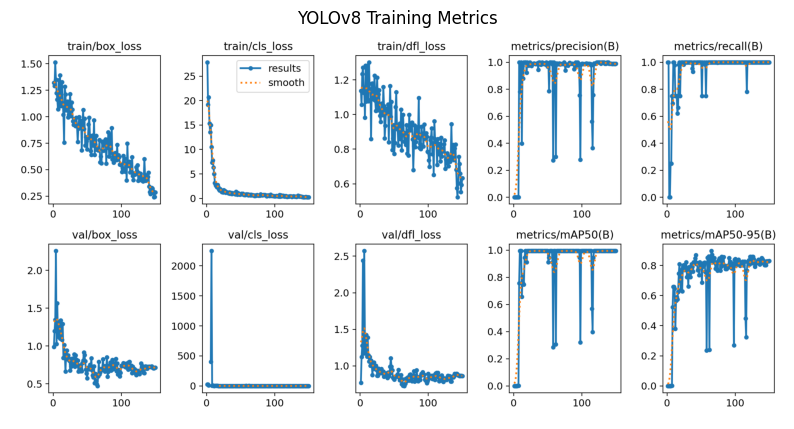

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('runs/detect/train/results.png')
plt.figure(figsize=(10,6))
plt.imshow(img)
plt.axis('off')
plt.title('YOLOv8 Training Metrics')
plt.show()

# Check the validation batches with labels

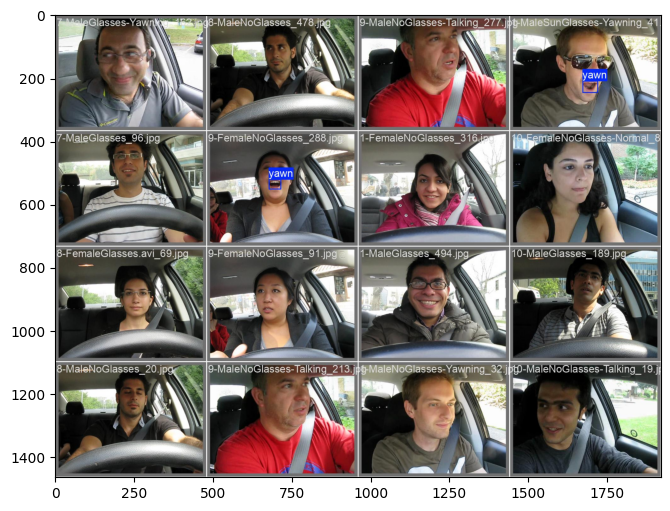

In [7]:
img = mpimg.imread('runs/detect/train/val_batch0_labels.jpg')
plt.figure(figsize=(10,6))
plt.imshow(img)
plt.show()

# Test the model

In [10]:
from ultralytics import YOLO

# Load the trained YOLO model
model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")

# Run inference on the test images
results = model.predict(source="/kaggle/input/yawdd-test/test-sample", conf=0.5, iou=0.3, save=True)


image 1/200 /kaggle/input/yawdd-test/test-sample/1-FemaleNoGlasses-Normal_3.jpg: 480x640 (no detections), 36.2ms
image 2/200 /kaggle/input/yawdd-test/test-sample/1-FemaleNoGlasses-Normal_43.jpg: 480x640 (no detections), 6.1ms
image 3/200 /kaggle/input/yawdd-test/test-sample/1-FemaleNoGlasses-Talking_44.jpg: 480x640 (no detections), 7.4ms
image 4/200 /kaggle/input/yawdd-test/test-sample/1-FemaleNoGlasses-Talking_5.jpg: 480x640 (no detections), 6.2ms
image 5/200 /kaggle/input/yawdd-test/test-sample/1-FemaleNoGlasses-Yawning_7.jpg: 480x640 (no detections), 6.5ms
image 6/200 /kaggle/input/yawdd-test/test-sample/1-FemaleNoGlasses_400.jpg: 480x640 (no detections), 6.1ms
image 7/200 /kaggle/input/yawdd-test/test-sample/1-FemaleNoGlasses_46.jpg: 480x640 (no detections), 6.1ms
image 8/200 /kaggle/input/yawdd-test/test-sample/1-FemaleNoGlasses_558.jpg: 480x640 (no detections), 6.0ms
image 9/200 /kaggle/input/yawdd-test/test-sample/1-MaleGlasses_266.jpg: 480x640 (no detections), 6.3ms
image 10/2

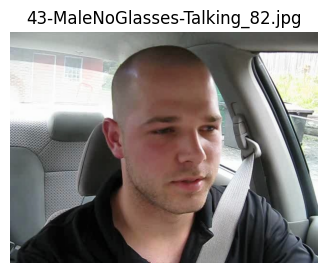

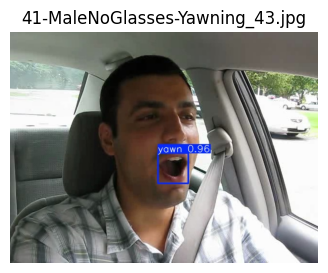

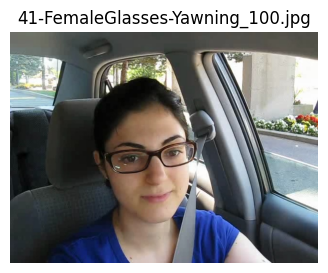

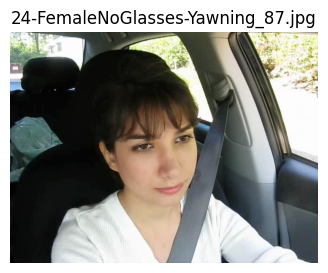

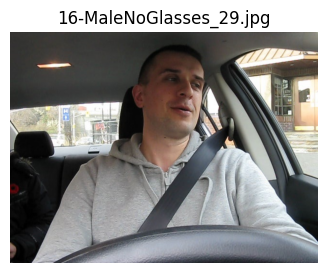

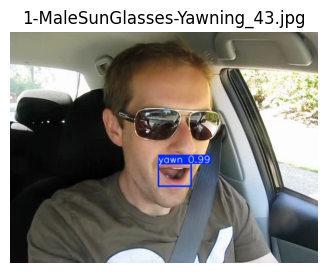

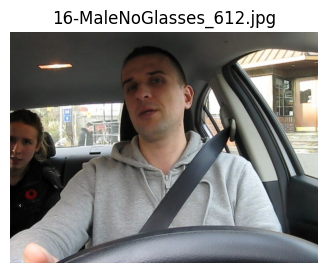

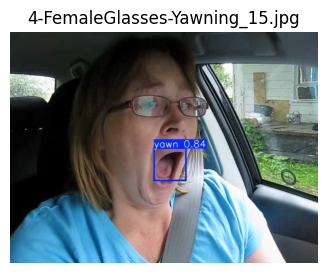

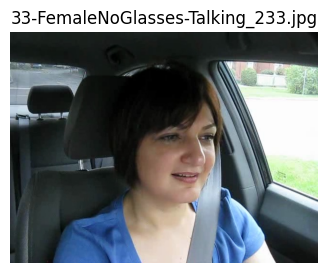

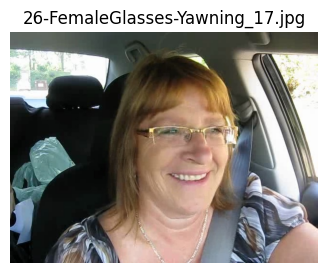

In [13]:
import matplotlib.pyplot as plt
import cv2
from IPython.display import display, Image
import glob

result_paths = glob.glob("runs/detect/predict/*.jpg")

for path in result_paths[20:30]:  # show a few results
    img = cv2.imread(path)[..., ::-1]
    plt.figure(figsize=(4, 3))
    plt.imshow(img)
    plt.title(os.path.basename(path))
    plt.axis("off")
    plt.show()

# Archive the output folder generated by YOLO and create a downloadable link

In [ ]:
from ultralytics import YOLO

# Load your trained model
model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")

# Run inference on your test images
results = model.predict(source="/kaggle/input/yawdd-test/test-sample", conf=0.5, iou=0.3, save=True, save_dir="/kaggle/working/runs/predict")

In [ ]:
import shutil

shutil.make_archive("yolo_output", 'zip', "/kaggle/working/runs")

In [ ]:
from IPython.display import FileLink

FileLink("yolo_output.zip")